# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [3]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    x = np.array(x)
    y = np.array(y)
    return np.linalg.norm(x-y)

In [29]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d = euclidianDistance(prev_centroid, cur_centroid)
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = d_list.index(min(d_list))

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                Sx = Sy = 0
                for item in samples:
                    Sx = Sx + item[0]
                    Sy = Sy + item[1]
                len_samples = len(samples)
                new_centroid = (Sx/len_samples, Sy/len_samples)

                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [29]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

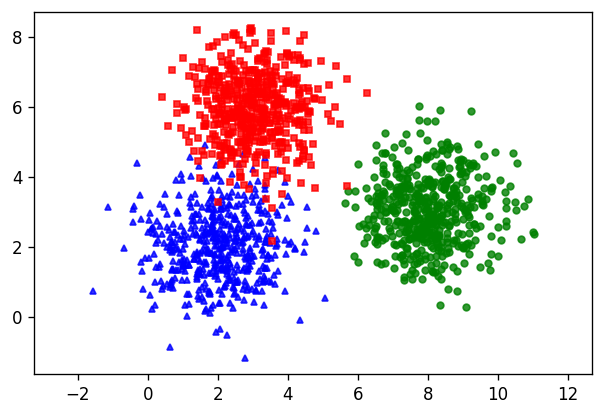

In [5]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


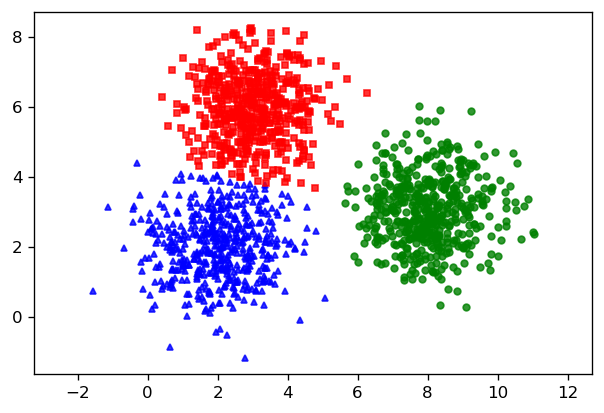

In [32]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[8.02344787 3.061206  ]
 [3.01440769 5.96971345]
 [2.01380571 2.02688416]]


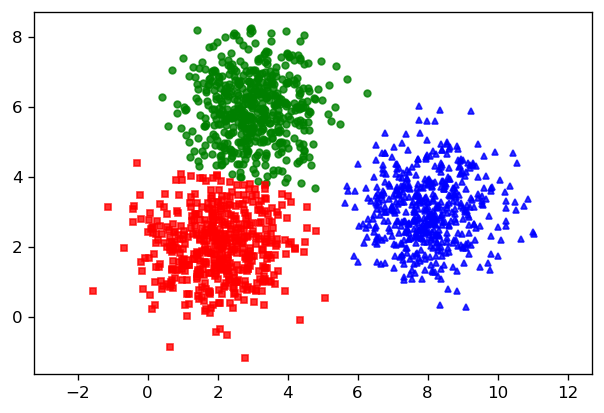

In [33]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [15]:
import copy

# K-medois Implementation
# This implementation is based on the PAM original algorithm
# references:
# https://en.wikipedia.org/wiki/K-medoids
# https://www.bio-ai.org/2021/08/20/a-deep-dive-into-partitioning-around-medoids/

class k_medoids:
    def __init__(self, k=2):
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters.
        '''
        self.k = k
        
    # Calculate distances between all points and all current medoids
    def calculate_distances(self, data, medoids):
        '''
        Parameters
        ----------
        data: input data.
        medoids: medoids
        
        Returns:
        ----------
        distances matrix
        '''
        distances = [[0 for _ in range(len(medoids))] for _ in range(len(data))]

        for o in range(len(data)):
            for m in range(len(medoids)):
                distances[o][m] = euclidianDistance(data[o], medoids[m])

        return distances


    # Calculate the total cost 
    def calculate_cost(self, data, medoids):
        '''
        Parameters
        ----------
        data: input data.
        medoids: medoids
        
        Returns:
        ----------
        total cost
        '''
        distances = np.array(self.calculate_distances(data, medoids))
        costs = [0 for _ in range(len(medoids))]
        cluster_id = np.array([np.argmin(row) for row in distances])

        # number of columns in the distance matrix equals the number of clusters
        for cluster in range(len(medoids)):
            costs[cluster] = sum(distances[cluster_id == cluster, cluster])

        return sum(costs)


    def get_non_medoids(self, data, medoids):
        '''
        Parameters
        ----------
        data: input data.
        medoids: medoids
        
        Returns:
        ----------
        non_medoids: non-medoids points
        '''
        non_medoids = []
        for x in data:
            if x not in np.array(medoids):
                non_medoids.append(x)

        return non_medoids

    
    # Get the best medoid for a potential swap
    def get_best_swap_medoid(self, data, m):
        ''' 
        Parameters
        ----------
        data: input data.
        m: to be swapped medoid index

        Returns:
        ----------
        best_cost: best cost after swap
        best_medoid: best new medoid
        '''
        best_cost = float('inf')
        best_medoid = None
        non_medoids = self.get_non_medoids(data, self.medoids)
        temp_medoids = copy.deepcopy(self.medoids)
        
        for non_medoid_id in range(len(non_medoids)):
            candidate_medoid = non_medoids[non_medoid_id]
            
            # temporary swap and recompute the cost
            temp_medoids[m] = candidate_medoid
            this_cost = self.calculate_cost(data, temp_medoids)
            
            if this_cost < best_cost:
                best_cost = this_cost
                best_medoid = candidate_medoid

        return best_cost, best_medoid

    
    def fit(self, data):
        ''' 
        Parameters
        ----------
        data: input data.

        Returns:
        ----------
        medoids: list of converged medoids
        '''
        self.medoids = []
        
        # BUILD phase
        # Select first medoid as the one which has the smallest cost
        distances = [[euclidianDistance(p1, p2) for p2 in data] for p1 in data]
        distances = [sum(row) for row in distances]

        self.medoids.append(data[np.argmin(distances)])

        # From the remaining non_medoids select the next one that has the smallest cost
        # until we have k medoids
        while len(self.medoids) < self.k:
            non_medoids = self.get_non_medoids(data, self.medoids)
            best_cost = float('inf')
            for non_medoid_id in range(len(non_medoids)):
                candidate_medoid = non_medoids[non_medoid_id]
                candidate_cost = self.calculate_cost(data, self.medoids + [candidate_medoid])
                if candidate_cost < best_cost:
                    best_medoid = candidate_medoid
                    best_cost = candidate_cost

            # Add the best medoid to the medoids
            self.medoids.append(best_medoid)

        # Calculate initial cost  
        cost = self.calculate_cost(data, self.medoids)
    
        # SWAP phase
        # Run until algorithm converged
        while True:
            candidate_swaps = []
            for medoid_id in range(len(self.medoids)):
                temp_cost, medoid = self.get_best_swap_medoid(data, medoid_id)
                candidate_swaps.append([temp_cost, medoid])

            candidate_swaps = np.array(candidate_swaps, dtype="object")
            
            # Select and perform the best swap
            medoid_to_swap = np.argmin(candidate_swaps[:, 0])
            self.medoids[medoid_to_swap] = candidate_swaps[medoid_to_swap, 1] 
            new_cost = self.calculate_cost(data, self.medoids)

            if new_cost < cost:
                cost = new_cost
            else:
                break
        
        return np.array(self.medoids)

                
    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.

        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
        pred = []
        for i in range(len(data)):
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclidianDistance(self.medoids[j], data[i]))

            pred.append(np.argmin(d_list))

        return np.array(pred)

Centers found by your model:
[[2.98247616 6.03383403]
 [7.93224207 3.0213355 ]
 [1.98413249 2.04159709]]


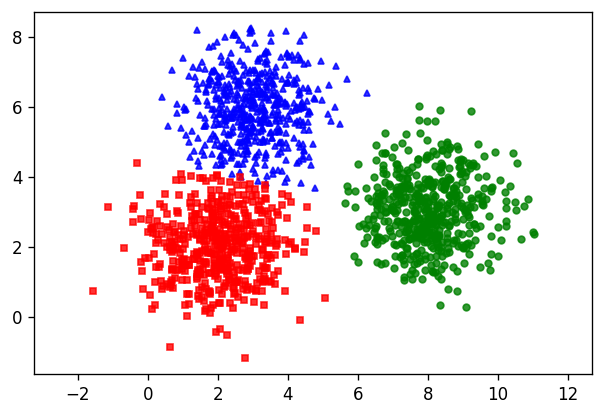

In [16]:
model2 = k_medoids(k=3)
print('Centers found by your model:')
print(model2.fit(X))

pred = model2.predict(X)

visualize(X, pred)

Centers found by scikit-learn:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


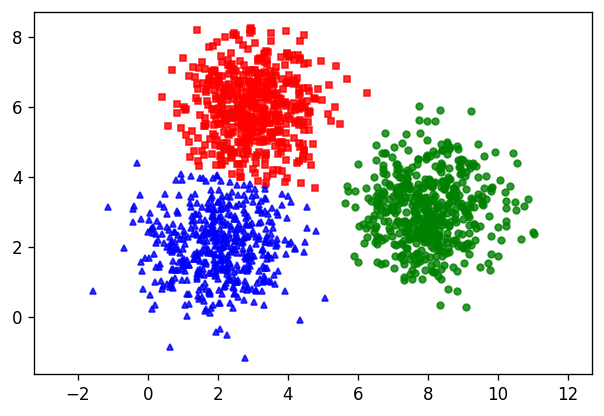

In [31]:
from sklearn_extra.cluster import KMedoids
model2 = KMedoids(n_clusters=3, method='pam').fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

>Tâm của từng cụm trong K-means được tính toán từ giá trị trung bình, còn tâm cụm của K-medoids là một điểm có trong dữ liệu có average dissimilarity là thấp nhất, hay tổng khoảng cách giữa các điểm đến medoid gần nhất là thấp nhất

# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [17]:
from sklearn import datasets
iris = datasets.load_iris()

In [18]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

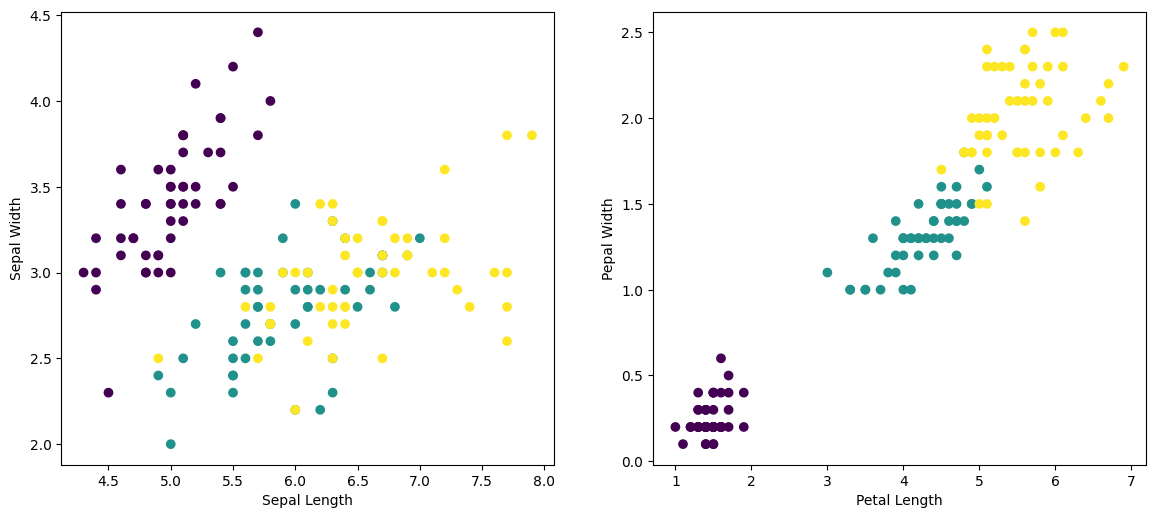

In [19]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

- Đặc trưng Petal Width và Petal Length giúp phân cụm tốt hơn so với Sepal Width và Sepal Length 

In [21]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

Text(0.5, 1.0, 'Predicted')

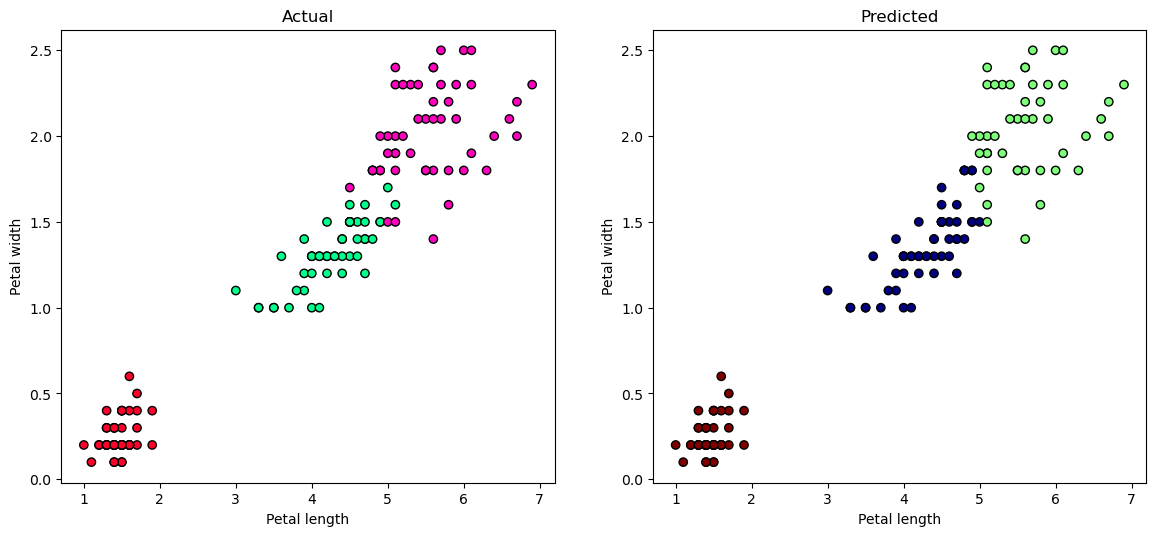

In [41]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:



### Thực hiện tương tự với thuật toán K-medois

In [22]:
model = k_medoids(k=3)
centers = model.fit(D)
print(centers)

[[4.3 1.3]
 [1.4 0.2]
 [5.5 2.1]]


Text(0.5, 1.0, 'Predicted')

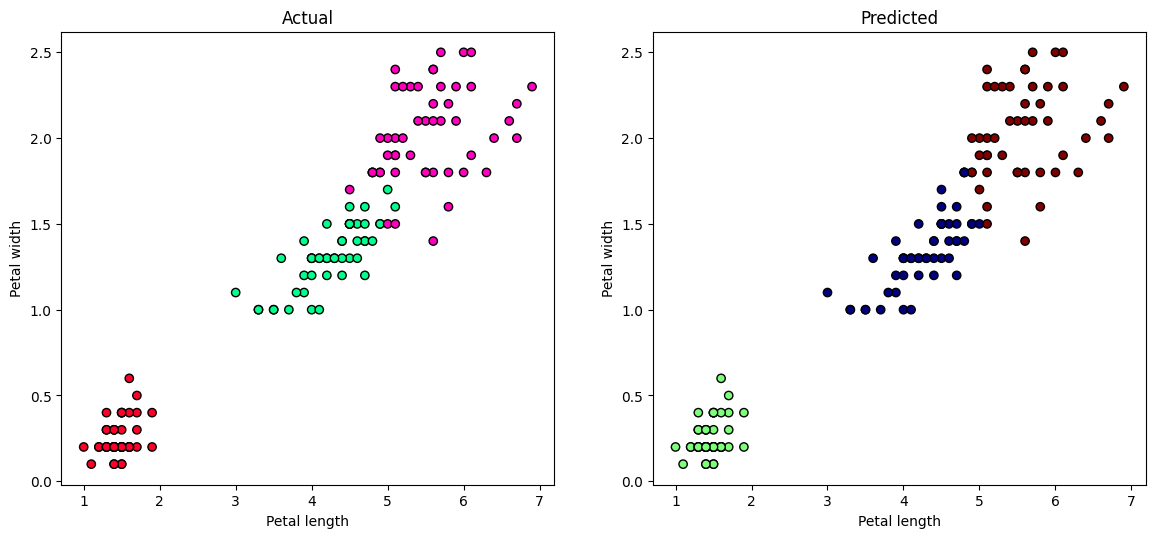

In [23]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

K-medoid cho kết quả khá tốt chỉ sai tại 5 điểm và có phần chính xác hơn K-means
